In [4]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

## Load image

In [5]:
image = cv2.imread("../data/img/terasse.jpeg")

## Plot colour histograms

```cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate]])```

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. 
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

## Plot individual color channel

__Split into channels__

In [ ]:
(B, G, R) = cv2.split(image)

__Calculate histogram__

Remember that both _[image]_ and _[channel]_ need to represented as lists!

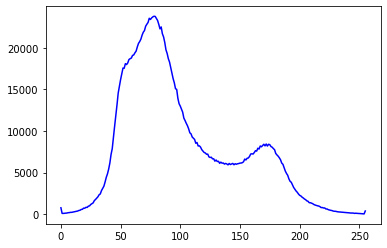

In [6]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist, color="Blue")

__OR__

In [ ]:
hist = cv2.calcHist([B], [0], None, [256], [0, 256])
plt.plot(hist, color="Blue")

## Plot multiple channels at the same time

In [ ]:
# split channels
channels = cv2.split(image)
# names of colours
colors = ("b", "g", "r")
# create plot
plt.figure()
# add title
plt.title("Multiple channels")
# Add xlabel
plt.xlabel("Bins")
# Add ylabel
plt.ylabel("# of Pixels")

# for every tuple of channel, colour
for (channel, color) in zip(channels, colors):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    # Plot histogram
    plt.plot(hist, color=color)
    # Set limits of x-axis
    plt.xlim([0, 256])
# Show plot
plt.show()

__Wrap up into function__

In [ ]:
def plot_histogram(image, title, mask=None):
    # split channels
    channels = cv2.split(image)
    # names of colours
    colors = ("b", "g", "r")
    # create plot
    plt.figure()
    # add title
    plt.title(title)
    # Add xlabel
    plt.xlabel("Bins")
    # Add ylabel
    plt.ylabel("# of Pixels")

    # for every tuple of channel, colour
    for (channel, color) in zip(channels, colors):
        # Create a histogram
        hist = cv2.calcHist([channel], [0], mask, [256], [0, 256])
        # Plot histogram
        plt.plot(hist, color=color)
        # Set limits of x-axis
        plt.xlim([0, 256])
    # Show plot
    plt.show()

## Test functions

In [ ]:
plot_histogram(image, "Colour Histogram")

## Iterate over folder

In [ ]:
# Import pathlib
from pathlib import Path

# point to image dir
image_dir = os.path.join("..", "data", "img")

# Iterate over files
for image in Path(image_dir).glob("*.png"):
    #cv2 and pathlib don't play nicely
    image_path = str(image)
    # read image
    image = cv2.imread(image_path)
    # Get image name from image_path
    _, image_name = os.path.split(image_path)
    # output plot
    plot_histogram(image, image_name)

## Multidimensional historams

Now that we are working with multi-dimensional his- tograms, we need to keep in mind the number of bins we are using. 

In previous examples, I’ve used 256 bins for demonstration purposes. However, if we used a 256 bins for each dimension in a 2D histogram, our resulting histogram would have 256 × 256 = 65,536 separate pixel counts. Not only is this wasteful of resources, it’s not practical. 

Most applications use somewhere between 8 and 64 bins when computing multi-dimensional histograms. So we use 32 instead of 256.

In [ ]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

In [ ]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([image[1], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([image[0], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)

__Compare hist__

In [ ]:
image1 = cv2.imread("../data/img/terasse.jpeg")
image2 = cv2.imread("../data/img/the_bedroom.jpg")

__minmax_normalization__

(value−min)/(max-min)

In [ ]:
hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
hist1 = cv2.normalize(hist1,hist1,0,255,cv2.NORM_MINMAX)

In [ ]:
hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
hist2 = cv2.normalize(hist2,hist2,0,255,cv2.NORM_MINMAX)

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

__Abandon hope all ye who enter!__

The code below attemps to visualise a 3D histogram. Not great, but kinda works.

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
ratio = 5000 / np.max(hist1)
bins = 8

for (x, plane) in enumerate(hist1):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            if hist1[x][y][z] > 0.0:
                siz = ratio * hist1[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)
plt.show()